## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [2]:
#Importing necessary packages
import pandas as pd 
!pip install tensorflow
from tensorflow import keras

In [3]:
#Importing dataset from package, defining train and test data
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

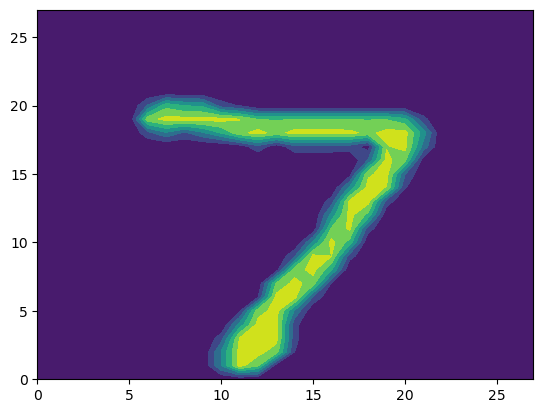

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

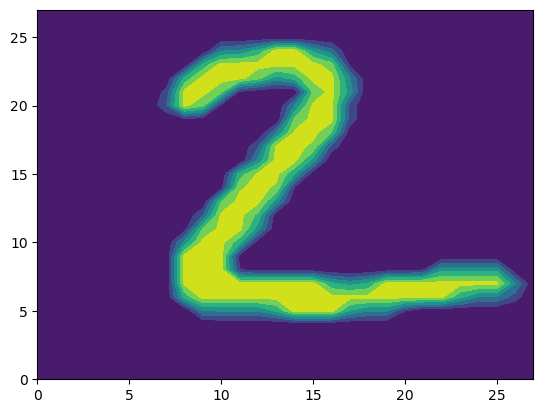

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

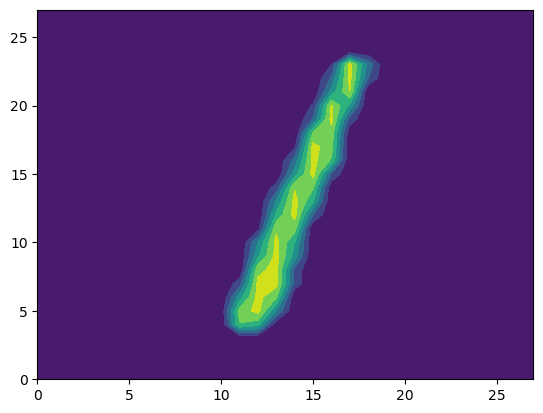

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

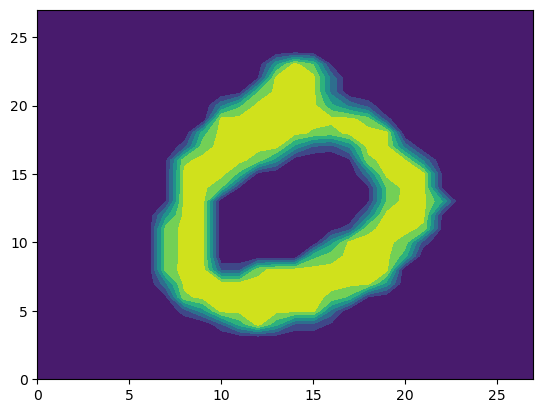

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

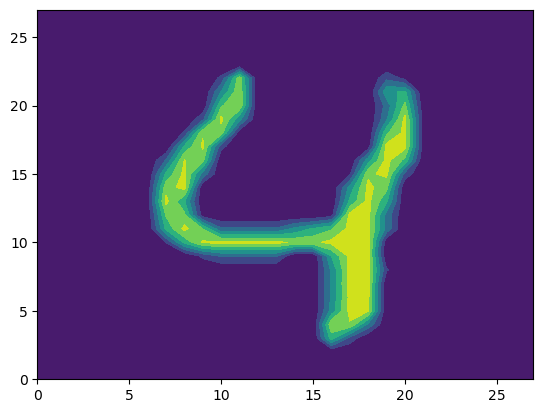

In [4]:
#Printing matrixes
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [5]:
#Checking the shape of X_train
X_train.shape

(60000, 28, 28)

In [6]:
#Checking the shape of X_test
X_test.shape

(10000, 28, 28)

In [7]:
#Checking the shape of X_train[i]
X_train[i].shape

(28, 28)

In [8]:
#Checking X_test[i] shape
X_test[i].shape

(28, 28)

In [9]:
#Checking y_train shape
y_train.shape

(60000,)

In [10]:
#Checking y_test shape
y_test.shape

(10000,)

In [13]:
X_train_reshaped = X_train.reshape(-1, 28*28)  # Reshape to (60000, 784)
X_test_reshaped = X_test.reshape(-1, 28*28)    # Reshape to (10000, 784)

In [17]:
print(X_train_reshaped.shape)  # Checking that it's 2D now
print(X_test_reshaped.shape)  

(60000, 784)
(10000, 784)


In [14]:
#Importing knn tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
model = KNeighborsClassifier(n_neighbors=3)  # Tuning k, defining the model
digit_model= model.fit(X_train_reshaped, y_train) #Training the model with training data
digit_pred = digit_model.predict(X_test_reshaped) #Predicting using the trained model

Classifier Accuracy: 0.971


In [48]:
N_train = len(y_train)
N_test = len(y_test)
k_bar = 5 # Number of k's we will loop over and try
Acc = [] #Accuracy

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a model for all values k
    digit_model = model.fit(X_train_reshaped,y_train) # Train the model on our data
    digit_pred = digit_model.predict(X_test_reshaped) # Predict values for test set
    Acc.append( np.sum( digit_pred == y_test)/N_test ) # Accuracy on testing data, this takes the number of predicted values that equals the true values (essentially the number correct) and divides by the number tested

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 #K cannot be 0
print(k_star) #Returning our optimal k-value

[3]


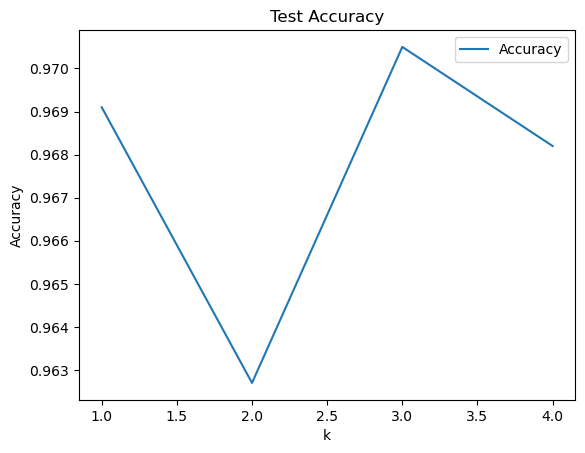

In [20]:
plt.plot(np.arange(1,k_bar+1),Acc,label='Accuracy') #Defining the plot and looping across all of the different k_bar values we are testing
plt.xlabel("k") #X axis label
plt.ylabel("Accuracy") #Y axis label
plt.legend(loc='upper right') #Legend placement
plt.title('Test Accuracy') #Title
plt.show() 

In [55]:
accuracy = accuracy_score(y_test, digit_pred) #Defining the accuracy score for prediction (we can define since we know the true y values of the data)
print(f"Classifier Accuracy: {accuracy:.3f}") #Printing the accuracy to the nearest hundreth

Classifier Accuracy: 0.971


The accuracy with a k-value of 3 is 97.1%. This was the best performing k value, we can see from the accuracy plot that this is where the model's accuracy peaks. We find that a k-value of two yields the lowest accuracy out of all of the values that I tested. Even then, this accuracy of 96.3% shows that the model is quite competent at predicting the y_test digits.

I also see that after a k-value of 3 the values begin to decrease in accuracy. It would be interesting to expand this graph and see if it goes back up. We could look at the classifier all the way up to a k-value of 15 or twenty. It is difficult to do this because it takes so long to loop over the k-values!

In [21]:
pd.crosstab(y_test,digit_pred) #Cross Tabulating the predicted digits with the true digits in the data to see what mistakes were most common

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,1,1,0,0,1,0,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,11,8,993,1,1,0,0,16,2,0
3,0,2,5,979,1,10,1,7,2,3
4,3,9,0,0,952,0,4,1,0,13
5,4,0,0,17,2,862,5,1,0,1
6,6,3,0,0,4,3,942,0,0,0
7,0,23,5,0,5,0,0,988,0,7
8,9,3,5,16,6,19,5,5,902,4


The biggest confusion according to the matrix seems to 1s that are predicted as 7s. There are 23 instances of this mistake. Additionally, there are 16 instances of seven predicted as 2 and 7 predicted as 9. As result, 7 is confused 32 times for other values. There are very few mistakes made when classifying 8. I am not sure why these patterns have come out of the data, but it certain is interesting to wondering why the classifier is so good at predicting the digidt 8, and not very create when it comes to 7.

### My Application of the Content ###

In [135]:
pic = np.array([[[255, 0, 255], [20, 20, 80], [130, 0, 255]],   # Row 1
                  [[255, 0, 130], [255, 0, 255], [150, 20, 255]],   # Row 2
                  [[50, 30, 120], [255, 100, 150], [148, 90,200]],
                  [[40,0,70],[245,100,255],[90,0,50]]])# Row 3


## Here I have created an image in matrix form. It is 3 dimensional. The first dimension is the number/size of rows. The second is the size of columns (4) and the third dimension is the size of the tuples themselves (3).

Text(0.5, 1.0, 'I am Just a Girl')

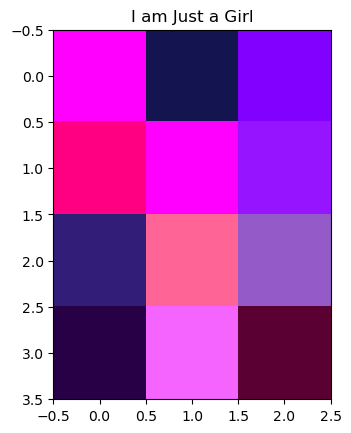

In [141]:
plt.imshow(pic)
plt.title('I am Just a Girl') 

In [129]:
pic_vector = pic.reshape(-1) #I used the .reshape(-1) function to flatten my matrix into a 1D vector. This makes the data tabular and allows a computer to work on it with ML tools

In [131]:
print(pic_vector) #Verifying that my image data is now one dimensional

[255   0 255  20  20  80 130   0 255 255   0 130 255   0 255 150  20 255  50  30 120 255 100 150 148  90 200  40   0  70 245 100 255  90   0  50]
